
🔢 Numeric columns: ['ID', 'Price', 'Avg ratings', 'Total ratings', 'Delivery time']

📊 Descriptive Statistics:

                  ID        Price  Avg ratings  Total ratings  Delivery time
count    8680.000000  8680.000000  8680.000000    8680.000000    8680.000000
mean   244812.071429   348.444470     3.655104     156.634793      53.967051
std    158671.617188   230.940074     0.647629     391.448014      14.292335
min       211.000000     0.000000     2.000000      20.000000      20.000000
25%     72664.000000   200.000000     2.900000      50.000000      44.000000
50%    283442.000000   300.000000     3.900000      80.000000      53.000000
75%    393425.250000   400.000000     4.200000     100.000000      64.000000
max    466928.000000  2500.000000     5.000000   10000.000000     109.000000

🚨 Outlier Detection (IQR method):
ID: 0 outliers
Price: 583 outliers
Avg ratings: 0 outliers
Total ratings: 995 outliers
Delivery time: 22 outliers


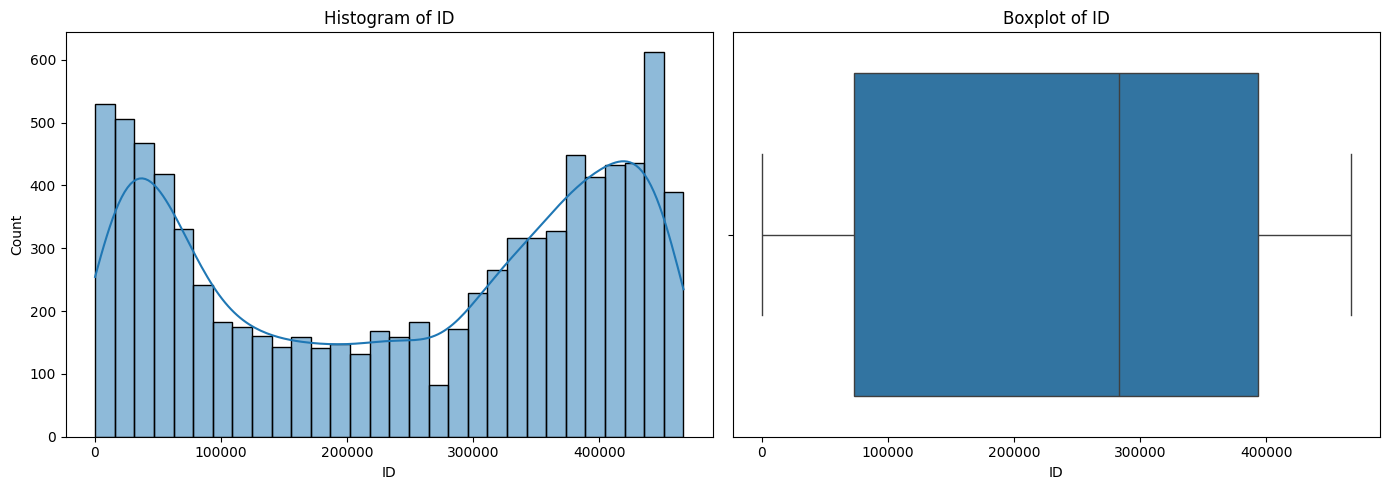

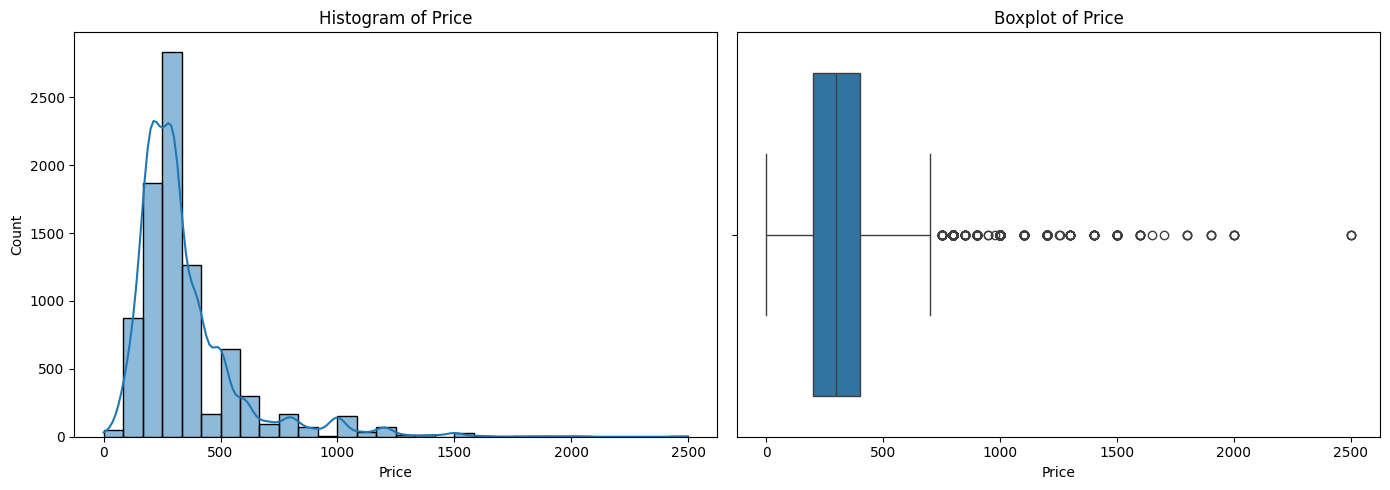

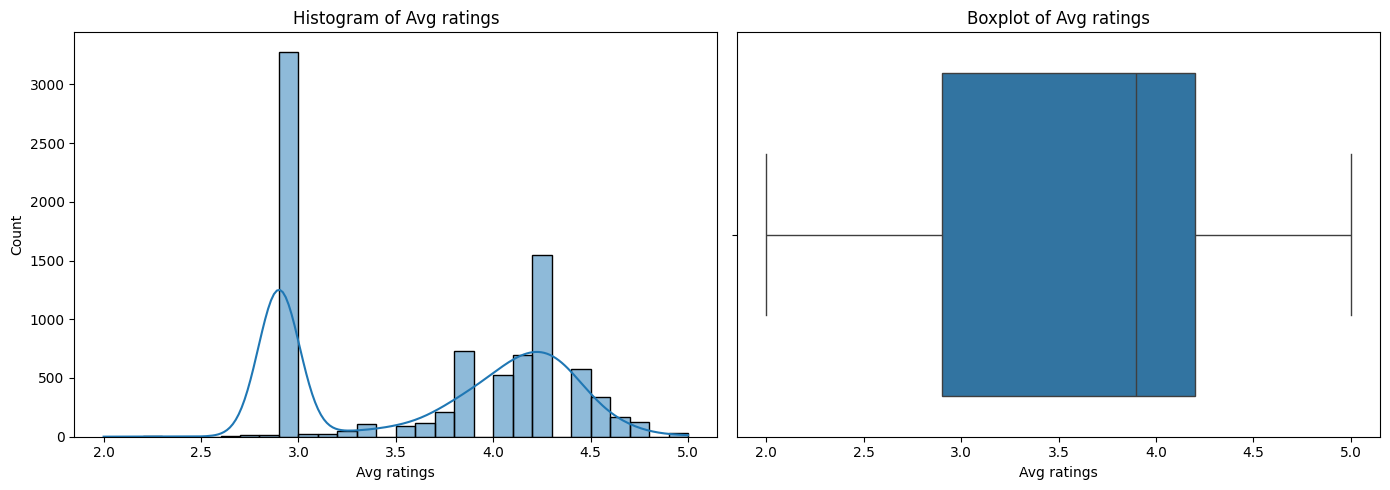

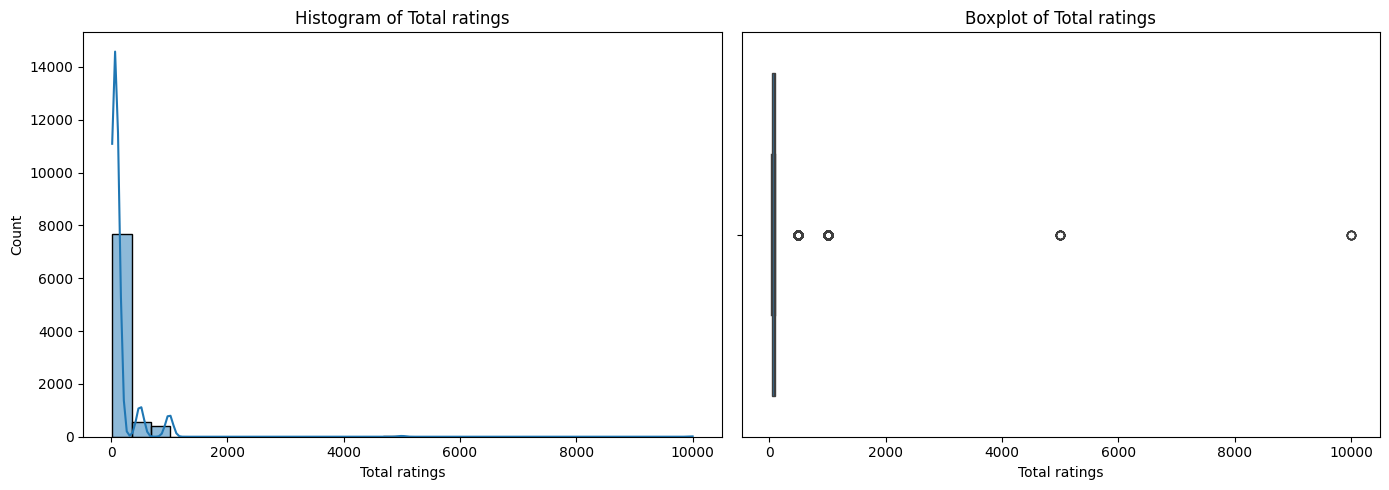

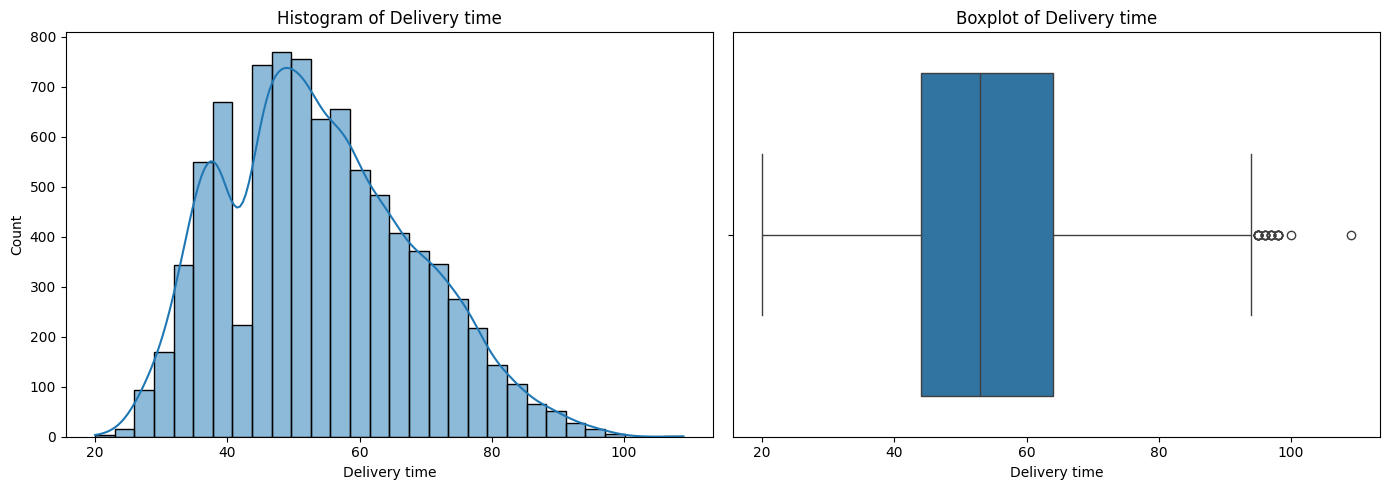

In [3]:
# Question: Advanced Data Profiling and Outlier Detection
# Description: Perform detailed data profiling including outlier detection for numeric columns.


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/workspaces/AI_DATA_ANALYSIS_/src/Module 3/swiggy.csv')

# Step 1: Identify numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\n🔢 Numeric columns: {numeric_cols}")

# Step 2: Descriptive statistics
print("\n📊 Descriptive Statistics:\n")
print(df[numeric_cols].describe())

# Step 3: Detect outliers using IQR method
print("\n🚨 Outlier Detection (IQR method):")
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers")

# Step 4: Visualize distributions and outliers
for col in numeric_cols:
    plt.figure(figsize=(14, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()



